<a href="https://colab.research.google.com/github/mcova100-jpg/Machine_Learning/blob/main/Chapter_7_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.4 Decision Tree and Random Forest with Scikit-Learn

In [2]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Glucose,BMI,Outcome
0,141,33.02,0
1,83,30.20,0
2,128,27.16,0
3,112,35.16,1
4,71,27.22,0


In [4]:
df.isnull().sum()

,0
Glucose,0
BMI,0
Outcome,0


In [5]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

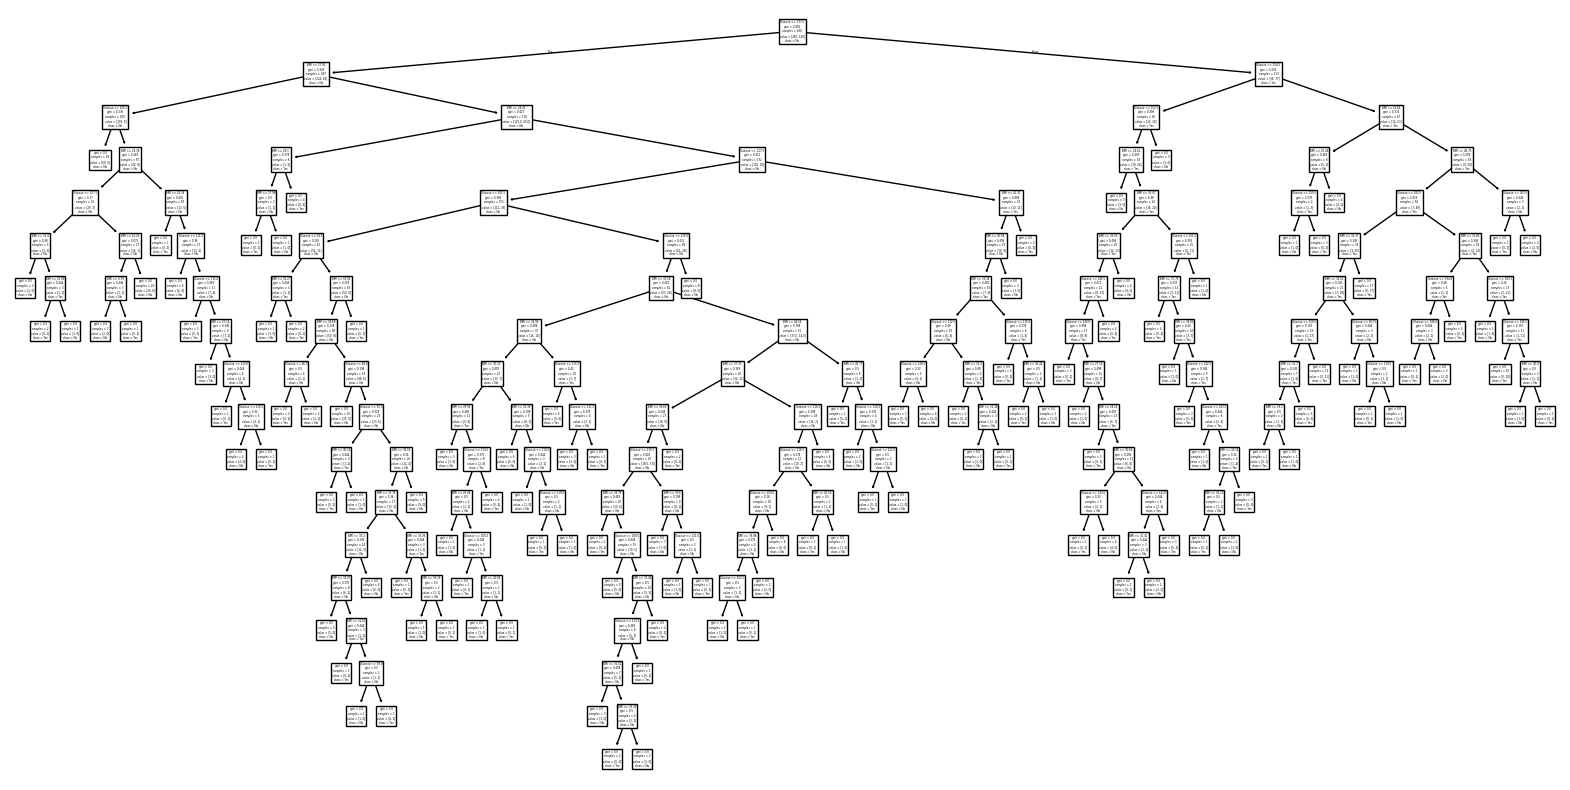

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['No', 'Yes'])
plt.show()

In [8]:
clf.set_params(max_depth = 3)

DecisionTreeClassifier(max_depth=3, random_state=0)

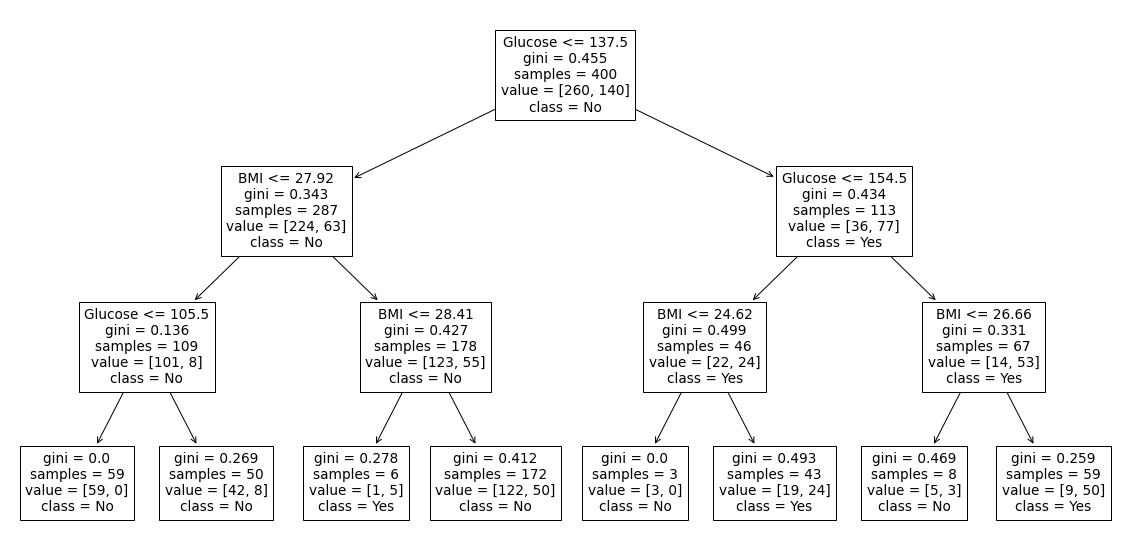

In [ ]:
clf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['No', 'Yes'])
plt.show()

In [9]:
clf.predict([[90, 20], [200, 30]])

array([0, 1])

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()
accuracy

np.float64(0.7125)

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(n_estimators = 200, max_depth=3, random_state=0)

In [12]:
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()
accuracy

np.float64(0.725)

# 7.6 SVM with Scikit-Learn

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
scaler = ('scaler', StandardScaler())
clf_svc = ('SVM', SVC(kernel='rbf', random_state=0))
pipeline = Pipeline([scaler, clf_svc])

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC(random_state=0))])

In [15]:
pipeline.predict([[90, 20], [200, 30]])

array([0, 1])

In [16]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()
accuracy

np.float64(0.745)

In [17]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.74